# Guided Project: Finding Heavy Traffic Indicators in I-94

### Project description

In this project we will analyse potential traffic indicators of heavy traffic on I-94(https://en.wikipedia.org/wiki/Interstate_94). These could be weather, time of the day, time of the week, season, or any other mark.

We will use the dataset provided by John Hogue, it is available in the UCI Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

In [29]:
import pandas as pd
import numpy as np
import seaborn as sbs

In [30]:
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [31]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analyzing Traffic

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94.info()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


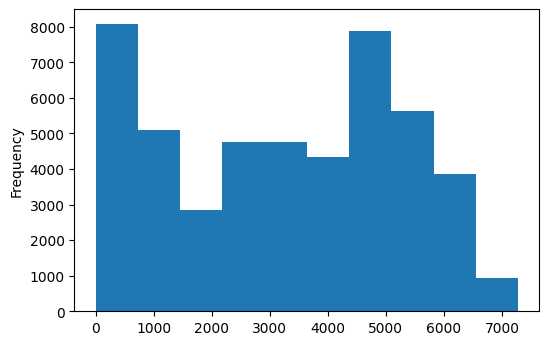

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
i_94['traffic_volume'].plot.hist()
plt.show()



In [34]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Traffic volume reveals that for an hour, average traffic shows 3200 cars, with minimum of 0, 25% of the time there were 1193 cars while at 75% of the time there were 4933 cars with a maximum peak of 7280 cars per hour out of 48204 cars recorded in total. This gives us a good starting point to check and compare daytime and nighttime data.

## Daytime vs. Nighttime Traffic Volume

In [35]:
(i_94['date_time'].head())

datetime = pd.to_datetime(i_94['date_time'])

i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >=  7) & (i_94['date_time'].dt.hour <19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour < 7) | (i_94['date_time'].dt.hour >= 19)]
print(night.shape)



(23877, 9)
(24327, 9)


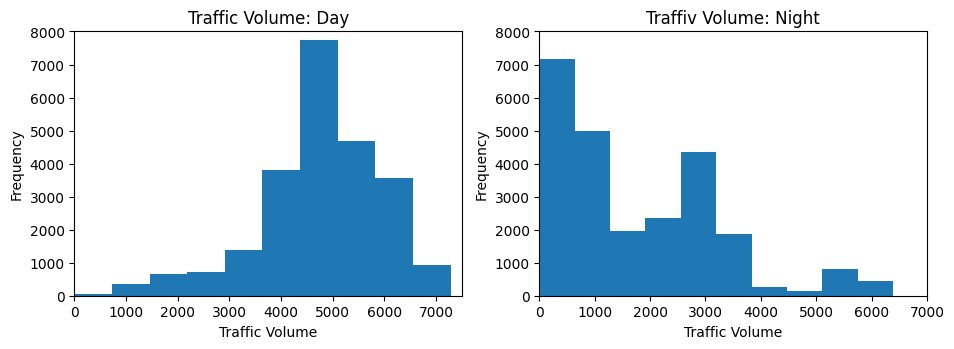

In [36]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(0, 7000)
plt.ylim(0, 8000)
plt.title('Traffiv Volume: Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()


In [37]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [38]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

From the above descibe method we see that there is a significan difference between the traffic during the night and traffic during the day.
On a day time an average of 4762 cars have have been recorded for an hour, while for the same time during the night there are only 1785 cars.

Graph for the daytime traffic is left skewed which means 75% of the time there were 4252 cars or more.
And for the graph representing the night volume traffic we see it is righ skewed which means there is much less traffic during the night. 75% of the itme per hour there are over 530 cars up to 2819 cars. This is much less than the daily traffic.

## Time Indicators

We are only interested in heavy traffic, thus we can exclude the night data from our analysis as we concluded that traffic during the day is much more in comparison with the nigh.

One of the possible indicators of heavy traffic could be the time. As there could be more cars on the road during certain time of the day, certain day of the week or certain month.
We are going to show a few line plots according to following parameters:
- Month
- Day of the week
- Time of the day

In [39]:
day['month'] = day['date_time'].dt.month

by_month = day.groupby('month').mean()
by_month['traffic_volume']


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

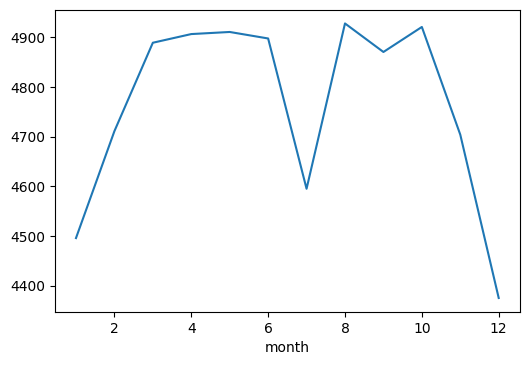

In [40]:
by_month['traffic_volume'].plot.line()
plt.show()

Traffic durrign December and first 1-2 weeks of January seem to be lower than the other months. There is also a drop in the traffic volume during July, most likely these drops in car traffic are due to the national holidys, Christmas, New Years and possibly 4th of July.
However, we would need additional analysis for the decrease in July. Thus, we will examine car traffic in July for the past years.

In [41]:
day['year'] = day['date_time'].dt.year

by_year = day.groupby('year').mean()
by_year['traffic_volume']

year
2012    4675.346861
2013    4834.084298
2014    4765.309296
2015    4748.448485
2016    4637.518293
2017    4865.961752
2018    4726.280534
Name: traffic_volume, dtype: float64

day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

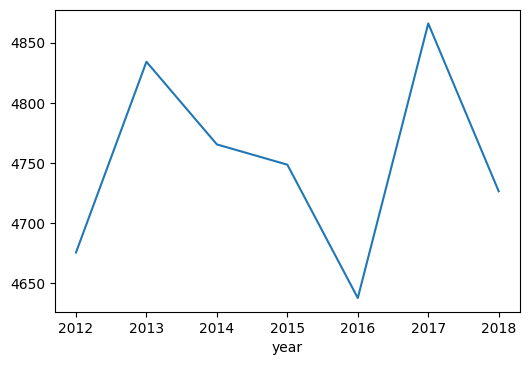

            temp    rain_1h  snow_1h  clouds_all  traffic_volume  month
year                                                                   
2013  296.796832   0.529838      0.0   24.245946     4914.354054    7.0
2014  296.225777   0.296686      0.0   52.542522     4871.598240    7.0
2015  296.657288   0.457241      0.0   35.301887     4613.146226    7.0
2016  297.018584  24.633670      0.0   52.534483     3924.923645    7.0
2017  297.139799   0.000000      0.0   41.724311     4734.120301    7.0
2018  296.794566   0.000000      0.0   46.719178     4586.899543    7.0


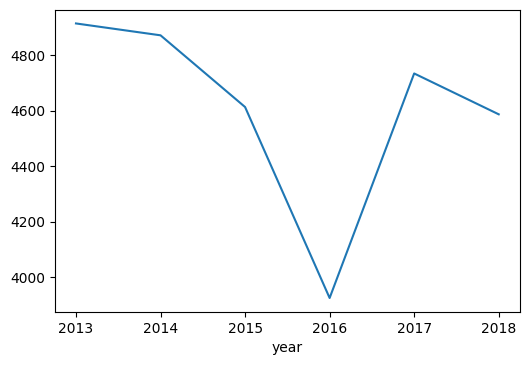

In [42]:
by_year['traffic_volume'].plot.line()

only_july = day[day['month'] == 7]
only_july = only_july.groupby('year').mean()
plt.show()

only_july['traffic_volume'].plot.line()
print(only_july)

Typically, the traffic during the summer period including July is heavy, however, there is only one year where we see this significant drop in traffic volume. And this is 2016, which would suggest a road construciton.

## Time Indicators (II)

We will now look into day of the week as a time indicator

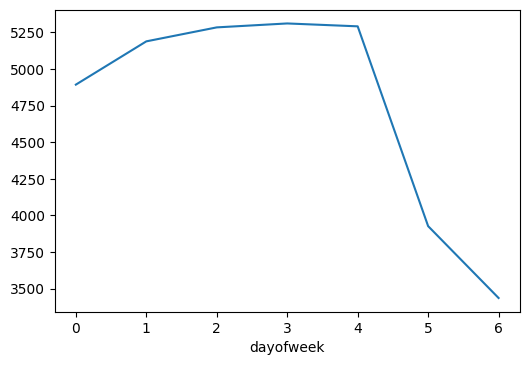

In [43]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

by_dayofweek['traffic_volume'].plot.line()


As the graph shows - we see heavy traffic during business days (Monday to Friday) with values of above 5000 per hour, except for Monday. And traffic eases during the weekends with values under 4000 cars per hour.

## Time Indicators (III)

Lastly, we will examine time of the day, as a potential indicator. But as weekends will drag down the values we will examine average values separately 

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


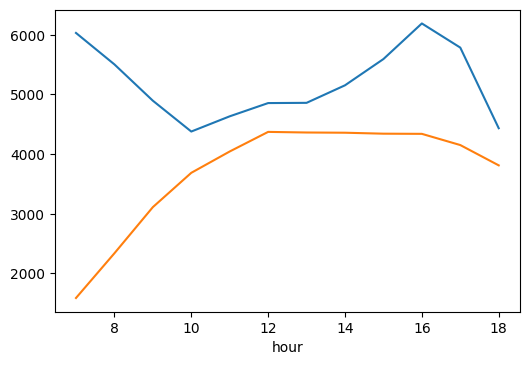

In [44]:
day['hour'] = day['date_time'].dt.hour
business_day = day.copy()[day['dayofweek'] <= 4] # 4 = Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 = Saturday

by_hour_business = business_day.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

by_hour_business['traffic_volume'].plot.line(),

by_hour_weekend['traffic_volume'].plot.line()



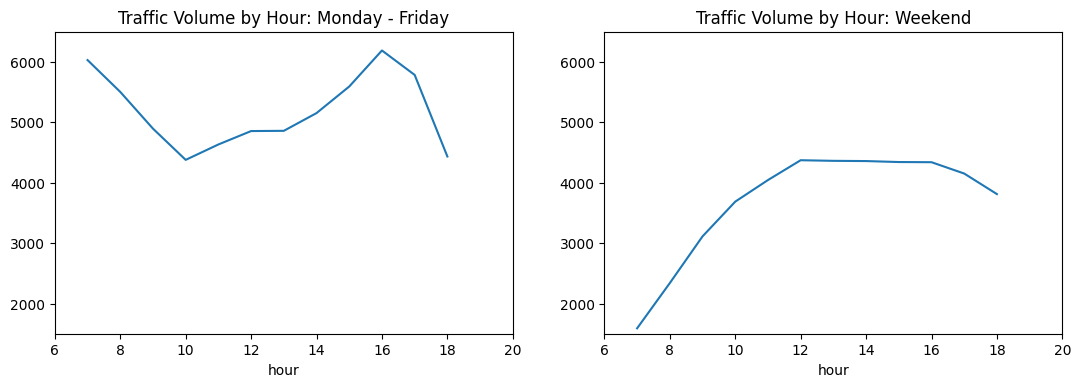

In [45]:
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.title('Traffic Volume by Hour: Monday - Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.title('Traffic Volume by Hour: Weekend')
plt.show()




Plotting the data for volume traffic by hour for business hours shows, heavy traffic is occuring around 7 in the morning, and 5 in the afternoon. Which are the rush hours.
And we see significant difference between the traffic in the weekend and normal business days.

As a conclusion from the time indicators we see three major points which show time indicators as a factor in traffic.
- There is a heavy traffic during November - March period (during the cold months), while traffic during March - October is a bit less.
- We see heavy traffic during business days, and traffic duing the weekends is much less.
- When looking on an hour basis we noticed heavu traffic is usually during business day in rush hours - 6 - 8 and 16 - 18.

## Weather Indicators

Another possible factor that causes heavy traffic is weather. Our dataset has some very useful columns that show varios weather data that can be taken into consideration during heavy traffic.
These are: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

In [46]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Based simply on the correlation coefficient, we see that only temperature shows the strongest correlation of 0.13. Other relevant columns do not show any strong correlation - between any of the rain_1h, snow_1h, clouds_all and traffic_volume.

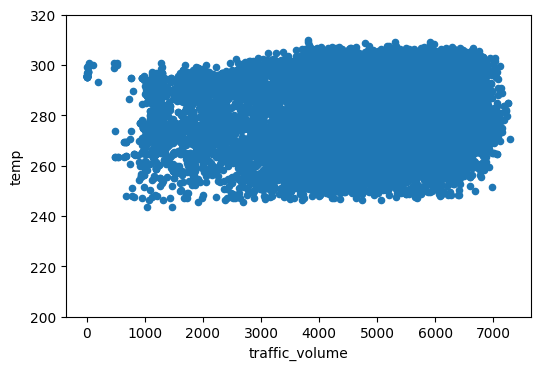

In [47]:
day.corr()['traffic_volume']
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(200, 320)
plt.show()


Although temp showed strongest correlation of all weather columns when we plotted the data we see that temperature is not really an indicator of heavy traffic. Thus, we are going to look at the categorical weather-related columns: weather_main and weather_description.

In [48]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

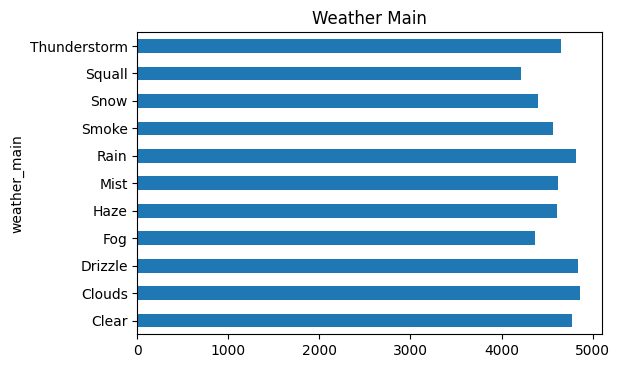

In [49]:
by_weather_main['traffic_volume'].plot.barh()
plt.title('Weather Main')
plt.show()


Weather indicator bar graph shows ther aren't any indicators that affect traffic volume heavily, and we do not see traffic volume to exceed 5000 cars per hour. We will check into detail bylooking into more granular cathegorical information in weather description column.

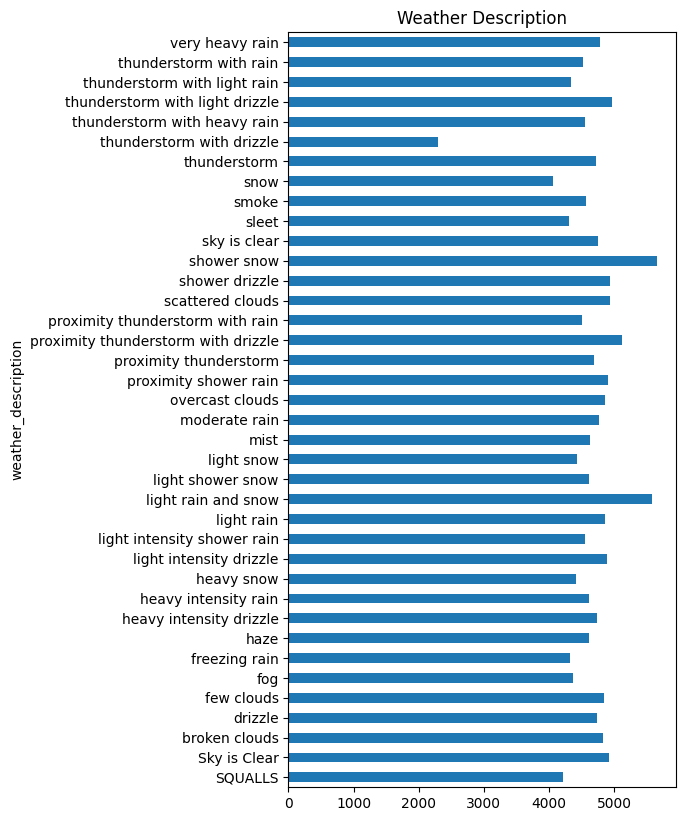

In [50]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5, 10))
plt.title('Weather Description')
plt.show()

When we examine various weather conditions we see that light rain and snow, shower snow, and thunderstorm with light drizzle  seem to affect volume traffic. 
These type of weather conditions are considered bad weather but no necessarily that bad. However, during these type of weather is where we see heavy traffic. Rationale behind this is when it rains or when weather is bad and cold in general people tend to use their cars more. 

Thus, during these three types of weather conditions we see traffic volume is well over 5000 cars per hour:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.
    
* Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle